**Importing Libraries**

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder,RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

**Loading DataSet**

In [140]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (3).csv


In [141]:
df=pd.read_csv('Mall_Customers.csv')

In [142]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [143]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [144]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [145]:
print(df.isnull().sum())  # Check missing values


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [146]:
#Encode gender column
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [147]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [148]:
#Selecting features for clustering
features=['Gender','Age','Annual Income (k$)','Spending Score (1-100)']
X=df[features]

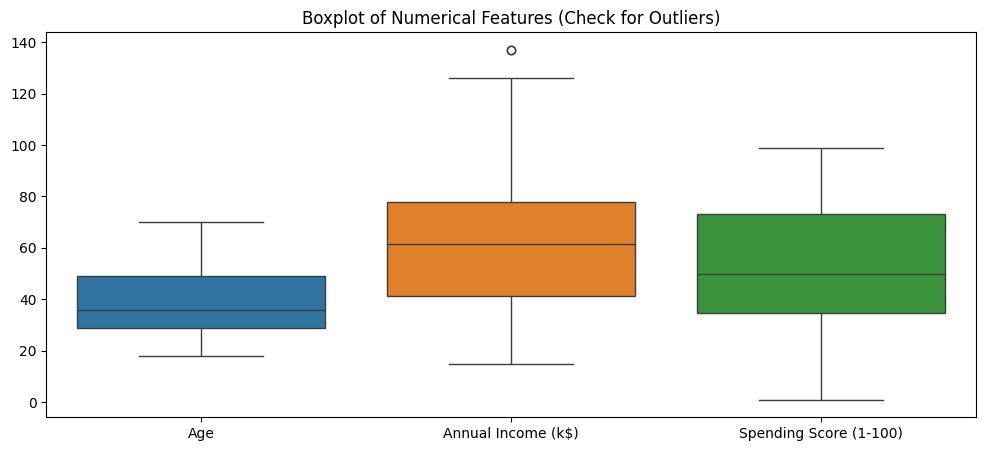

In [149]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title("Boxplot of Numerical Features (Check for Outliers)")
plt.show()

In [150]:
print("Before Removing Outliers:", df.shape[0])

# Compute IQR and remove outliers
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("After Removing Outliers:", df_cleaned.shape[0])


Before Removing Outliers: 200
After Removing Outliers: 198


In [151]:
scaler = RobustScaler()  # Better for outliers
X_scaled = scaler.fit_transform(df[features])

In [152]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [153]:
#Standarize the features
scale=StandardScaler()
X_scale=scale.fit_transform(X_pca)

In [154]:
imputer = SimpleImputer(strategy='mean')
dataset_imputed = imputer.fit_transform(X_scale)
#Determine the optimal number of clusters using Elbow method
wcss=[]
K_range = range(2, 7)
for i in K_range:
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(dataset_imputed)
  wcss.append(kmeans.inertia_)

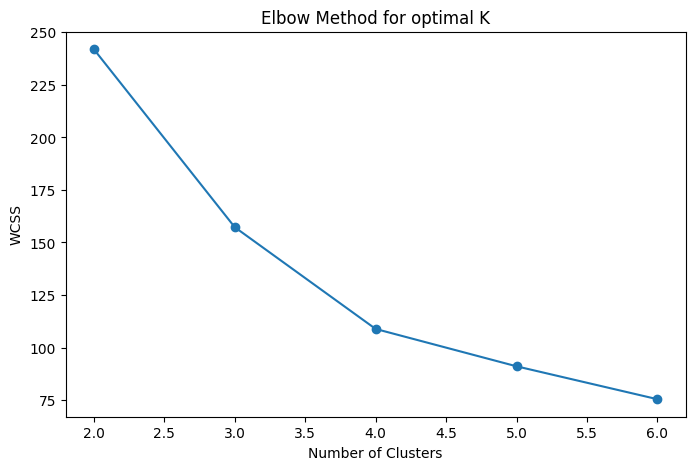

In [155]:
plt.figure(figsize=(8,5))
plt.plot(K_range,wcss,marker='o',linestyle='-')
plt.title('Elbow Method for optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [156]:
#Apply K-means with optimal k (assume k=5 based on the elbow method)
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
df['Cluster'] = kmeans.fit_predict(dataset_imputed)

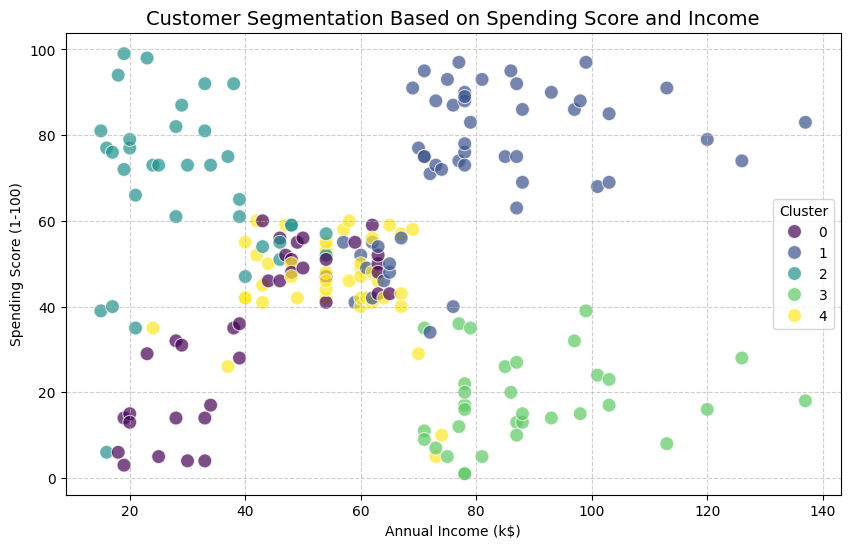

In [157]:
#Visualize Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['Cluster'],s=100,alpha=0.7,palette='viridis')
plt.grid(True, linestyle="--", alpha=0.6)  # Add a light grid
plt.title("Customer Segmentation Based on Spending Score and Income", fontsize=14)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

<ipython-input-158-428555c6e29d>:11: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ro-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(2,10), silhouette_scores, 'ro-', linestyle="--", markersize=8)


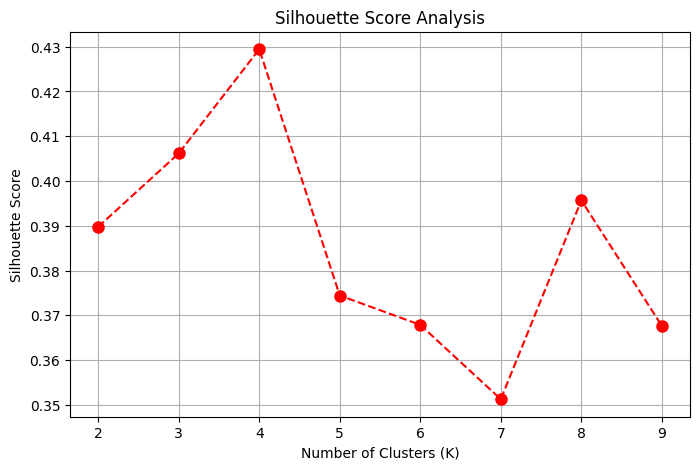

In [158]:
silhouette_scores = []

for k in range(2, 10):  # Silhouette is not defined for K=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(dataset_imputed)
    sil_score = silhouette_score(dataset_imputed, labels)
    silhouette_scores.append(sil_score)

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(range(2,10), silhouette_scores, 'ro-', linestyle="--", markersize=8)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.grid(True)
plt.show()

In [160]:
df.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
5,6,0,22,17,76,2
6,7,0,35,18,6,0
7,8,0,23,18,94,2
8,9,1,64,19,3,0
9,10,0,30,19,72,2


**🔹 Observations from Clusters:**

Cluster 0 (Purple) - Customers with low income and low spending scores.

Likely budget-conscious shoppers who spend less.

Cluster 1 (Blue) - Customers with high income and high spending scores.

These are premium customers who have high purchasing power and spend a lot.

Cluster 2 (Teal/Blue-Green) - Customers with low income but high spending scores.

These are impulse buyers, possibly spending more than their means.

Cluster 3 (Green) - Customers with high income but low spending scores.

These are conservative spenders, possibly saving more rather than spending.

Cluster 4 (Yellow) - Customers with moderate income and moderate spending scores.

These could be average shoppers with balanced spending behavior.

✅ Business Insights:
Target High-Spending Customers

Cluster 1 (high income, high spending) should be retained with premium offers.

Cluster 2 (low income, high spending) could be offered discounts to encourage more spending.

Engage Low-Spending High-Income Customers

Cluster 3 (high income, low spending) should be targeted with exclusive deals or luxury services.

Budget-Conscious Strategies

Cluster 0 (low income, low spending) can be targeted with affordable products or loyalty programs.**bold text**